# NLP Analysis

Students receive an end-of-course survey at the close of their bootcamp program to help guide the learning and curriculum and student services teams toward improving our students' learning experience. In this activity, you will be working with one csv file to run an NLP analysis and chart the relationship between NPS scores and text comments.

Leverage any library at your disposal and load all dependencies. Be sure to add any comments for clarity and **show all code work** and results so we can easily replicate your work. 

If you are unsure of what is being asked, send an email if you have questions or list your assumptions in the document. 

Good Luck!

In [4]:
%matplotlib inline
# Load Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Connecting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read in the nps.csv file
copied_path = "/content/drive/MyDrive/nps.csv"
nps_df = pd.read_csv(copied_path)
nps_df

id  survey_source             submission_date  \
0                  1258443            bcs  2021-04-19 14:23:49.000000   
1                  1414859            bcs  2021-08-02 22:05:37.000000   
2                  1121258            bcs  2021-01-23 17:45:41.000000   
3                  1389913            bcs  2021-07-14 01:28:45.000000   
4                  1539541            bcs  2021-11-01 17:53:51.000000   
...                    ...            ...                         ...   
35853              1263070         canvas  2021-04-20 16:52:51.000000   
35854              1546021         canvas  2021-11-04 18:10:31.000000   
35855              1406099         canvas  2021-07-26 23:09:24.000000   
35856  19364_canvas_legacy  canvas legacy  2021-01-30 14:25:09.000000   
35857  19228_canvas_legacy  canvas legacy  2021-01-25 04:32:25.000000   

       course_id                      survey_name  recommend_to_others  \
0           3224                       mid-course                 10.0   
1           3187                       end-course                 10.0   
2           2752                       end-course                  5.0   
3           3048                       mid-course                  8.0   
4           3351                       mid-course                 10.0   
...          ...                              ...                  ...   
35853        518  blended-weekly-feedback-mid-nps                  8.0   
35854        306  blended-weekly-feedback-end-nps                 10.0   
35855        596  blended-weekly-feedback-mid-nps                  5.0   
35856        226                       end-course                 10.0   
35857        218                       end-course                  6.0   

                   recommend_higher_nine_or_ten_comments  \
0                                                    NaN   
1                                                    NaN   
2      The support with tutors could have been better...   
3      A lot of people that I talk to throughout the ...   
4                                                    NaN   
...                                                  ...   
35853                                                NaN   
35854                                                NaN   
35855                                                NaN   
35856                                                NaN   
35857                                                NaN   

                                             improvement  \
0                        More time to practice concepts.   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      During the Machine Learning Session, maybe slo...   
...                                                  ...   
35853  More time to consume the materials and more ti...   
35854                                            nothing   
35855         I feel this program is pretty good so far.   
35856                                                NaN   
35857                                                NaN   

       satisfied_with_instructional_team  satisfied_with_ssm  
0                                   10.0                10.0  
1                                   10.0                10.0  
2                                    9.0                 6.0  
3                                    8.0                10.0  
4                                   10.0                10.0  
...                                  ...                 ...  
35853                               10.0                 9.0  
35854                               10.0                10.0  
35855                                5.0                 5.0  
35856                               10.0                 8.0  
35857                                9.0                 9.0  

[35858 rows x 10 columns]

In [7]:
# Check the data types in the file and make any data type changes, as needed.
nps_df.dtypes

id                                        object
survey_source                             object
submission_date                           object
course_id                                  int64
survey_name                               object
recommend_to_others                      float64
recommend_higher_nine_or_ten_comments     object
improvement                               object
satisfied_with_instructional_team        float64
satisfied_with_ssm                       float64
dtype: object

In [8]:
# Remove any duplicate records, if any.
# How many unique submissions are there by survey_source, survey_name and course_id? 
# Rows containing duplicate data
duplicate_rows_df = nps_df[nps_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (25, 10)


In [10]:
# Used to count the number of rows before removing the data
nps_df.count()

id                                       35858
survey_source                            35858
submission_date                          35858
course_id                                35858
survey_name                              35858
recommend_to_others                      35843
recommend_higher_nine_or_ten_comments    10980
improvement                              22172
satisfied_with_instructional_team        35847
satisfied_with_ssm                       35847
dtype: int64

In [11]:
# Removing the duplicates 
nps_df1 = nps_df.drop_duplicates()
nps_df1.head()

id survey_source             submission_date  course_id survey_name  \
0  1258443           bcs  2021-04-19 14:23:49.000000       3224  mid-course   
1  1414859           bcs  2021-08-02 22:05:37.000000       3187  end-course   
2  1121258           bcs  2021-01-23 17:45:41.000000       2752  end-course   
3  1389913           bcs  2021-07-14 01:28:45.000000       3048  mid-course   
4  1539541           bcs  2021-11-01 17:53:51.000000       3351  mid-course   

   recommend_to_others              recommend_higher_nine_or_ten_comments  \
0                 10.0                                                NaN   
1                 10.0                                                NaN   
2                  5.0  The support with tutors could have been better...   
3                  8.0  A lot of people that I talk to throughout the ...   
4                 10.0                                                NaN   

                                         improvement  \
0                    More time to practice concepts.   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  During the Machine Learning Session, maybe slo...   

   satisfied_with_instructional_team  satisfied_with_ssm  
0                               10.0                10.0  
1                               10.0                10.0  
2                                9.0                 6.0  
3                                8.0                10.0  
4                               10.0                10.0

In [12]:
# Used to count the number of rows after removing the data
nps_df1.count()

id                                       35833
survey_source                            35833
submission_date                          35833
course_id                                35833
survey_name                              35833
recommend_to_others                      35818
recommend_higher_nine_or_ten_comments    10980
improvement                              22147
satisfied_with_instructional_team        35822
satisfied_with_ssm                       35822
dtype: int64

- 25 rows were deleted from original dataframe containing duplicate data

In [29]:
# Converting the column submission_date into datetime type
nps_df1['submission_date'] = pd.to_datetime(nps_df1['submission_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Verifying latest day in the dataset
max(nps_df1['submission_date'])

Timestamp('2022-02-08 16:45:39')

In [30]:
# Filter out all records older than 7 months from current date. Use the submission_date field. For example, if today is Feb 8, 2022, filter out submitted records
# older than July 7, 2021.
# Create a new df that includes the id, survey_name, course_id, recommend_to_others, improvement, satisfied_with_instructional_team, and satisfied_with_ssm
from datetime import date, timedelta   

seven_months_prior =  max(nps_df1['submission_date']) - timedelta(weeks=28)

last_seven_months = nps_df1[nps_df1['submission_date'] <= seven_months_prior]
last_seven_months.head()

id survey_source     submission_date  course_id survey_name  \
0   1258443           bcs 2021-04-19 14:23:49       3224  mid-course   
2   1121258           bcs 2021-01-23 17:45:41       2752  end-course   
3   1389913           bcs 2021-07-14 01:28:45       3048  mid-course   
8   1316181           bcs 2021-05-25 09:04:45       2746  end-course   
11  1344689           bcs 2021-06-14 19:53:26       3119  end-course   

    recommend_to_others              recommend_higher_nine_or_ten_comments  \
0                  10.0                                                NaN   
2                   5.0  The support with tutors could have been better...   
3                   8.0  A lot of people that I talk to throughout the ...   
8                   8.0  They need to see who needs more help especiall...   
11                 10.0                                                NaN   

                        improvement  satisfied_with_instructional_team  \
0   More time to practice concepts.                               10.0   
2                               NaN                                9.0   
3                               NaN                                8.0   
8                               NaN                                8.0   
11                          nothing                                9.0   

    satisfied_with_ssm  
0                 10.0  
2                  6.0  
3                 10.0  
8                  9.0  
11                 8.0

In [ ]:
## Part 1: Exploratory Analysis on NPS Scores

Text(0, 0.5, 'Count')

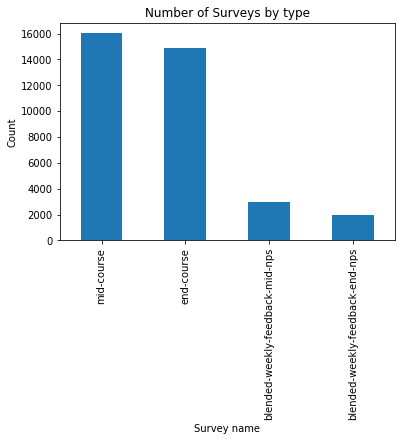

In [58]:
# Create bar charts for each survey_name type (mid course and end course) showing the count of recommend_to_others in the y-axis and the recommend_to_others score in the x-axis.
# Be sure to include a title, x and y labels, and value labels on each bar
nps_df1['survey_name'].value_counts().plot.bar()
plt.title('Number of Surveys by type')
plt.xlabel('Survey name')
plt.ylabel('Count')

<BarContainer object of 35833 artists>

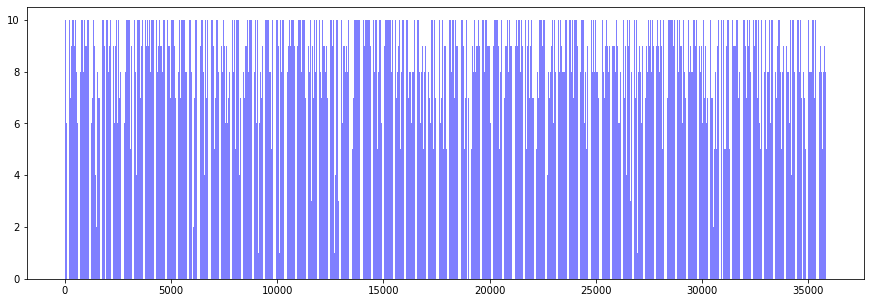

In [57]:
x_axis = np.arange(len(nps_df1['survey_name']))
plt.figure(figsize=(15,5))
plt.bar(x_axis, nps_df1['recommend_to_others'], color='b', alpha=0.5, align="edge")

In [61]:
# Create three new column in your df named 'sentiment_' for recommend_to_others, satisfied_with_instructional_team, and satisfied_with_ssm.
# Assign the following values where a Promoter score = 'positive' and Neutral Score = 'neutral' and Detractor Score = 'negative'
# Note: Promoter score is 9 or 10, Neutral score is 7 or 8, and Detractor score is 6 or less

# Create a list of our conditions
conditions = [
    (nps_df1['recommend_to_others'] >= 9),
    (nps_df1['recommend_to_others'] >= 7) & (nps_df1['recommend_to_others'] <= 8),
    (nps_df1['recommend_to_others'] <= 6)
    ]

# Create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
nps_df1['sentiment_rec_to_others'] = np.select(conditions, values)

# display updated DataFrame
nps_df1

# How many records are 'positive', 'neutral', and 'negative'? Group by course_id and survey_name. Use table or bar chart format to show results.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


id  survey_source     submission_date  course_id  \
0                  1258443            bcs 2021-04-19 14:23:49       3224   
1                  1414859            bcs 2021-08-02 22:05:37       3187   
2                  1121258            bcs 2021-01-23 17:45:41       2752   
3                  1389913            bcs 2021-07-14 01:28:45       3048   
4                  1539541            bcs 2021-11-01 17:53:51       3351   
...                    ...            ...                 ...        ...   
35853              1263070         canvas 2021-04-20 16:52:51        518   
35854              1546021         canvas 2021-11-04 18:10:31        306   
35855              1406099         canvas 2021-07-26 23:09:24        596   
35856  19364_canvas_legacy  canvas legacy 2021-01-30 14:25:09        226   
35857  19228_canvas_legacy  canvas legacy 2021-01-25 04:32:25        218   

                           survey_name  recommend_to_others  \
0                           mid-course                 10.0   
1                           end-course                 10.0   
2                           end-course                  5.0   
3                           mid-course                  8.0   
4                           mid-course                 10.0   
...                                ...                  ...   
35853  blended-weekly-feedback-mid-nps                  8.0   
35854  blended-weekly-feedback-end-nps                 10.0   
35855  blended-weekly-feedback-mid-nps                  5.0   
35856                       end-course                 10.0   
35857                       end-course                  6.0   

                   recommend_higher_nine_or_ten_comments  \
0                                                    NaN   
1                                                    NaN   
2      The support with tutors could have been better...   
3      A lot of people that I talk to throughout the ...   
4                                                    NaN   
...                                                  ...   
35853                                                NaN   
35854                                                NaN   
35855                                                NaN   
35856                                                NaN   
35857                                                NaN   

                                             improvement  \
0                        More time to practice concepts.   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      During the Machine Learning Session, maybe slo...   
...                                                  ...   
35853  More time to consume the materials and more ti...   
35854                                            nothing   
35855         I feel this program is pretty good so far.   
35856                                                NaN   
35857                                                NaN   

       satisfied_with_instructional_team  satisfied_with_ssm sentiment  \
0                                   10.0                10.0  positive   
1                                   10.0                10.0  positive   
2                                    9.0                 6.0  negative   
3                                    8.0                10.0   neutral   
4                                   10.0                10.0  positive   
...                                  ...                 ...       ...   
35853                               10.0                 9.0   neutral   
35854                               10.0                10.0  positive   
35855                                5.0                 5.0  negative   
35856                               10.0                 8.0  positive   
35857                                9.0                 9.0  negative   

      sentiment_rec_to_

In [62]:
# Create a list of our conditions
conditions = [
    (nps_df1['satisfied_with_instructional_team'] >= 9),
    (nps_df1['satisfied_with_instructional_team'] >= 7) & (nps_df1['satisfied_with_instructional_team'] <= 8),
    (nps_df1['satisfied_with_instructional_team'] <= 6)
    ]

# Create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
nps_df1['sentiment_with_instructional_team'] = np.select(conditions, values)

# display updated DataFrame
nps_df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


id survey_source     submission_date  course_id survey_name  \
0  1258443           bcs 2021-04-19 14:23:49       3224  mid-course   
1  1414859           bcs 2021-08-02 22:05:37       3187  end-course   
2  1121258           bcs 2021-01-23 17:45:41       2752  end-course   
3  1389913           bcs 2021-07-14 01:28:45       3048  mid-course   
4  1539541           bcs 2021-11-01 17:53:51       3351  mid-course   

   recommend_to_others              recommend_higher_nine_or_ten_comments  \
0                 10.0                                                NaN   
1                 10.0                                                NaN   
2                  5.0  The support with tutors could have been better...   
3                  8.0  A lot of people that I talk to throughout the ...   
4                 10.0                                                NaN   

                                         improvement  \
0                    More time to practice concepts.   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  During the Machine Learning Session, maybe slo...   

   satisfied_with_instructional_team  satisfied_with_ssm sentiment  \
0                               10.0                10.0  positive   
1                               10.0                10.0  positive   
2                                9.0                 6.0  negative   
3                                8.0                10.0   neutral   
4                               10.0                10.0  positive   

  sentiment_rec_to_others sentiment_with_instructional_team  
0                positive                          positive  
1                positive                          positive  
2                negative                          positive  
3                 neutral                           neutral  
4                positive                          positive

In [63]:
# Create a list of our conditions
conditions = [
    (nps_df1['satisfied_with_ssm'] >= 9),
    (nps_df1['satisfied_with_ssm'] >= 7) & (nps_df1['satisfied_with_ssm'] <= 8),
    (nps_df1['satisfied_with_ssm'] <= 6)
    ]

# Create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
nps_df1['sentiment_with_ssm'] = np.select(conditions, values)

# display updated DataFrame
nps_df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


id survey_source     submission_date  course_id survey_name  \
0  1258443           bcs 2021-04-19 14:23:49       3224  mid-course   
1  1414859           bcs 2021-08-02 22:05:37       3187  end-course   
2  1121258           bcs 2021-01-23 17:45:41       2752  end-course   
3  1389913           bcs 2021-07-14 01:28:45       3048  mid-course   
4  1539541           bcs 2021-11-01 17:53:51       3351  mid-course   

   recommend_to_others              recommend_higher_nine_or_ten_comments  \
0                 10.0                                                NaN   
1                 10.0                                                NaN   
2                  5.0  The support with tutors could have been better...   
3                  8.0  A lot of people that I talk to throughout the ...   
4                 10.0                                                NaN   

                                         improvement  \
0                    More time to practice concepts.   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  During the Machine Learning Session, maybe slo...   

   satisfied_with_instructional_team  satisfied_with_ssm sentiment  \
0                               10.0                10.0  positive   
1                               10.0                10.0  positive   
2                                9.0                 6.0  negative   
3                                8.0                10.0   neutral   
4                               10.0                10.0  positive   

  sentiment_rec_to_others sentiment_with_instructional_team sentiment_with_ssm  
0                positive                          positive           positive  
1                positive                          positive           positive  
2                negative                          positive           negative  
3                 neutral                           neutral           positive  
4                positive                          positive           positive

In [68]:
nps_df1 = nps_df1.drop(['sentiment'], axis = 1)
nps_df1.head()

id survey_source     submission_date  course_id survey_name  \
0  1258443           bcs 2021-04-19 14:23:49       3224  mid-course   
1  1414859           bcs 2021-08-02 22:05:37       3187  end-course   
2  1121258           bcs 2021-01-23 17:45:41       2752  end-course   
3  1389913           bcs 2021-07-14 01:28:45       3048  mid-course   
4  1539541           bcs 2021-11-01 17:53:51       3351  mid-course   

   recommend_to_others              recommend_higher_nine_or_ten_comments  \
0                 10.0                                                NaN   
1                 10.0                                                NaN   
2                  5.0  The support with tutors could have been better...   
3                  8.0  A lot of people that I talk to throughout the ...   
4                 10.0                                                NaN   

                                         improvement  \
0                    More time to practice concepts.   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  During the Machine Learning Session, maybe slo...   

   satisfied_with_instructional_team  satisfied_with_ssm  \
0                               10.0                10.0   
1                               10.0                10.0   
2                                9.0                 6.0   
3                                8.0                10.0   
4                               10.0                10.0   

  sentiment_rec_to_others sentiment_with_instructional_team sentiment_with_ssm  
0                positive                          positive           positive  
1                positive                          positive           positive  
2                negative                          positive           negative  
3                 neutral                           neutral           positive  
4                positive                          positive           positive

In [ ]:
# Calculate the NPS score for each category: recommend_to_others, satisifed_with_instructional_team, and satisfied_with_ssm.
# Group by course_id and survey_name
# Note: NPS score for a particular category = ((Num of Promoters - Num of Detractor) / Total Responses in that category) * 100 
# An NPS Score should be on a scale of -100 to 100 -- this is generally an integer up to two decimal places 

In [73]:
# Number of promoters for recommend_to_others (positive)
recommend_to_others_promoters = nps_df1.sentiment_rec_to_others.value_counts().positive
recommend_to_others_promoters

21670

In [74]:
# Number of detractors for recommend_to_others (negative)
recommend_to_others_detractors = nps_df1.sentiment_rec_to_others.value_counts().negative
recommend_to_others_detractors

5447

In [89]:
# NPS score for recommend_to_others
recommend_to_others_NPS = ((recommend_to_others_promoters - recommend_to_others_detractors) / nps_df1['recommend_to_others'].count()) * 100
print(f"NPS Score for recommend_to_others is: ", round(recommend_to_others_NPS,2))

NPS Score for recommend_to_others is:  45.29


In [81]:
# Number of promoters for sentiment_with_instructional_team (positive)
instructional_team_promoters = nps_df1.sentiment_with_instructional_team.value_counts().positive
instructional_team_promoters

26125

In [82]:
# Number of detractors for sentiment_with_instructional_team (negative)
instructional_team_detractors = nps_df1.sentiment_with_instructional_team.value_counts().negative
instructional_team_detractors

2948

In [88]:
# NPS score for sentiment_with_instructional_team
instructional_team_NPS = ((instructional_team_promoters - instructional_team_detractors) / nps_df1['sentiment_with_instructional_team'].count()) * 100
print(f"NPS Score for instructional_team is: ", round(instructional_team_NPS,2))

NPS Score for instructional_team is:  64.68


In [84]:
# Number of promoters for sentiment_with_ssm (positive)
ssm_promoters = nps_df1.sentiment_with_ssm.value_counts().positive
ssm_promoters

22845

In [85]:
# Number of detractors for sentiment_with_ssm (negative)
ssm_detractors = nps_df1.sentiment_with_ssm.value_counts().negative
ssm_detractors

5084

In [87]:
# NPS score for sentiment_with_instructional_team
ssm_NPS = ((ssm_promoters - ssm_detractors) / nps_df1['sentiment_with_ssm'].count()) * 100
print(f"NPS Score for ssm is: ", round(ssm_NPS,2))

NPS Score for ssm is:  49.57


In [ ]:
# Create a new df with only the "recommend_to_others", "sentiment", and "improvement" columns where survey_name == end-course


In [94]:
filter = nps_df1[nps_df1['survey_name'] == 'end-course']
filter

id  survey_source     submission_date  course_id  \
1                  1414859            bcs 2021-08-02 22:05:37       3187   
2                  1121258            bcs 2021-01-23 17:45:41       2752   
5                  1515148            bcs 2021-10-14 13:50:56       3385   
6                  1458764            bcs 2021-09-03 01:48:27       3151   
8                  1316181            bcs 2021-05-25 09:04:45       2746   
...                    ...            ...                 ...        ...   
35843              1333891            bcs 2021-06-07 16:46:35       3138   
35846              1410487            bcs 2021-07-29 22:09:05       2983   
35847              1165733            bcs 2021-02-20 20:13:34       2494   
35856  19364_canvas_legacy  canvas legacy 2021-01-30 14:25:09        226   
35857  19228_canvas_legacy  canvas legacy 2021-01-25 04:32:25        218   

      survey_name  recommend_to_others  \
1      end-course                 10.0   
2      end-course                  5.0   
5      end-course                  7.0   
6      end-course                  9.0   
8      end-course                  8.0   
...           ...                  ...   
35843  end-course                  8.0   
35846  end-course                 10.0   
35847  end-course                  3.0   
35856  end-course                 10.0   
35857  end-course                  6.0   

                   recommend_higher_nine_or_ten_comments  \
1                                                    NaN   
2      The support with tutors could have been better...   
5      longer lunch breaks, less subjective grading r...   
6                                                    NaN   
8      They need to see who needs more help especiall...   
...                                                  ...   
35843  Overall I'm very satisfied with the course. Da...   
35846                                                NaN   
35847                   Randomly assign project partners   
35856                                                NaN   
35857                                                NaN   

                                             improvement  \
1                                                    NaN   
2                                                    NaN   
5                                                    NaN   
6                                               More TAs   
8                                                    NaN   
...                                                  ...   
35843                                                NaN   
35846  More time on GraphQL, React, and maybe a bit o...   
35847                                                NaN   
35856                                                NaN   
35857                                                NaN   

       satisfied_with_instructional_team  satisfied_with_ssm  \
1                                   10.0                10.0   
2                                    9.0                 6.0   
5                                   10.0                 5.0   
6                                    9.0                 9.0   
8                                    8.0                 9.0   
...                                  ...                 ...   
35843                               10.0                 5.0   
35846                               10.0                10.0   
35847                                3.0                 2.0   
35856                               10.0                 8.0   
35857                                9.0                 9.0   

      sentiment_rec_to_others sentiment_with_instructional_team  \
1                    positive                          positive   
2                    negative                          positive   
5                     neutral                          positive   
6                    positive                          positive   
8                     neutral                           neut

In [96]:
# Create new pandas DataFrame.
nps_df2 = filter[['recommend_to_others','sentiment_rec_to_others', 'improvement']]
nps_df2

recommend_to_others sentiment_rec_to_others  \
1                     10.0                positive   
2                      5.0                negative   
5                      7.0                 neutral   
6                      9.0                positive   
8                      8.0                 neutral   
...                    ...                     ...   
35843                  8.0                 neutral   
35846                 10.0                positive   
35847                  3.0                negative   
35856                 10.0                positive   
35857                  6.0                negative   

                                             improvement  
1                                                    NaN  
2                                                    NaN  
5                                                    NaN  
6                                               More TAs  
8                                                    NaN  
...                                                  ...  
35843                                                NaN  
35846  More time on GraphQL, React, and maybe a bit o...  
35847                                                NaN  
35856                                                NaN  
35857                                                NaN  

[14898 rows x 3 columns]

In [ ]:
## Part 2: Using the new df created above, run an NLP analysis on the 'improvement' responses received from students

In [101]:
# Clean the dataframe by removing any stop words, special characters, punctuation, or white space in the "improvement" column
# Show the first 20 rows

# Dropping the missing values and showing value count
nps_df2_cleaned = nps_df2.dropna()
nps_df2_cleaned.head(20)

recommend_to_others sentiment_rec_to_others  \
6                   9.0                positive   
9                  10.0                positive   
11                 10.0                positive   
14                 10.0                positive   
18                  9.0                positive   
23                  9.0                positive   
28                  9.0                positive   
39                 10.0                positive   
41                 10.0                positive   
43                 10.0                positive   
44                 10.0                positive   
46                 10.0                positive   
48                  9.0                positive   
49                 10.0                positive   
54                 10.0                positive   
55                 10.0                positive   
60                 10.0                positive   
63                 10.0                positive   
66                 10.0                positive   
67                 10.0                positive   

                                          improvement  
6                                            More TAs  
9   I would ensure that the all of homework/projec...  
11                                            nothing  
14  Continue with the same learning method, by the...  
18    I am overall satisfied with the course, thanks.  
23  It should be emphasized to potential students ...  
28  Emphasis on lesson review when topics become h...  
39  I had a fabulous experience during this class ...  
41                                  More office hours  
43  I believe this course was incredible. The only...  
44  The only thing I would have tweaked is to have...  
46                                                  -  
48  There were many days where I felt that the ins...  
49  Instructions could be better laid out they're ...  
54  I think several things can help students more....  
55  I would suggest slightly slowing down on a few...  
60  Maybe focus on less topics and strengthen the ...  
63  Overall, the whole program was amazing. I just...  
66                                                  .  
67                             Nothing I can think of

In [100]:
#Detecting missing values
nps_df2_cleaned.isnull().sum()

recommend_to_others        0
sentiment_rec_to_others    0
improvement                0
dtype: int64

In [135]:
# Import clean dataframe into .txt file
nps_df2_cleaned['improvement'].to_csv(r"/content/drive/MyDrive/nps_improvement.txt", header=None, index=None, sep=' ', mode='a')

In [136]:
# Read in the nps2.txt file
copied_path = "/content/drive/MyDrive/nps_improvement.txt"
nps2_df = open(copied_path)
nps2_df

<_io.TextIOWrapper name='/content/drive/MyDrive/nps_improvement.txt' mode='r' encoding='UTF-8'>

In [137]:
text = nps2_df.read()

In [138]:
print(text)

"More TAs"
"I would ensure that the all of homework/project instructions are accurate and up to date and easy to follow."
nothing
"Continue with the same learning method, by the momment it works."
"I am overall satisfied with the course, thanks."
"It should be emphasized to potential students that the course is fast-paced because having someone tell you the course is fast-paced helps but something more concrete such as using graphs to detail time spent on projects/homework/studying etc."
"Emphasis on lesson review when topics become harder (JS, Node, React)"
"I had a fabulous experience during this class and really enjoyed every part of it."
"More office hours"
"I believe this course was incredible. The only thing I can personally recommend is to glance over some of the activities. They need some minor tweaking in relation to spelling, grammar, and some chronology. Other than that, everything has been truly spectacular. Thank you to all that were involved."
"The only thing I would have

In [157]:
# Import dependencies
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [145]:
# Tokenize the text by sentence
sentences = sent_tokenize(text)
sentences

['"More TAs"\n"I would ensure that the all of homework/project instructions are accurate and up to date and easy to follow."',
 'nothing\n"Continue with the same learning method, by the momment it works."',
 '"I am overall satisfied with the course, thanks."',
 '"It should be emphasized to potential students that the course is fast-paced because having someone tell you the course is fast-paced helps but something more concrete such as using graphs to detail time spent on projects/homework/studying etc."',
 '"Emphasis on lesson review when topics become harder (JS, Node, React)"\n"I had a fabulous experience during this class and really enjoyed every part of it."',
 '"More office hours"\n"I believe this course was incredible.',
 'The only thing I can personally recommend is to glance over some of the activities.',
 'They need some minor tweaking in relation to spelling, grammar, and some chronology.',
 'Other than that, everything has been truly spectacular.',
 'Thank you to all that we

In [146]:
# Tokenize the text into words
words = word_tokenize(text)
words

['``',
 'More',
 'TAs',
 "''",
 "''",
 'I',
 'would',
 'ensure',
 'that',
 'the',
 'all',
 'of',
 'homework/project',
 'instructions',
 'are',
 'accurate',
 'and',
 'up',
 'to',
 'date',
 'and',
 'easy',
 'to',
 'follow',
 '.',
 "''",
 'nothing',
 "''",
 'Continue',
 'with',
 'the',
 'same',
 'learning',
 'method',
 ',',
 'by',
 'the',
 'momment',
 'it',
 'works',
 '.',
 "''",
 '``',
 'I',
 'am',
 'overall',
 'satisfied',
 'with',
 'the',
 'course',
 ',',
 'thanks',
 '.',
 "''",
 '``',
 'It',
 'should',
 'be',
 'emphasized',
 'to',
 'potential',
 'students',
 'that',
 'the',
 'course',
 'is',
 'fast-paced',
 'because',
 'having',
 'someone',
 'tell',
 'you',
 'the',
 'course',
 'is',
 'fast-paced',
 'helps',
 'but',
 'something',
 'more',
 'concrete',
 'such',
 'as',
 'using',
 'graphs',
 'to',
 'detail',
 'time',
 'spent',
 'on',
 'projects/homework/studying',
 'etc',
 '.',
 "''",
 '``',
 'Emphasis',
 'on',
 'lesson',
 'review',
 'when',
 'topics',
 'become',
 'harder',
 '(',
 'JS',
 

In [148]:
# Find the frequency of each word
fdist = FreqDist(words)
# Print the 40 most common words
fdist.most_common(40)

[("''", 12722),
 ('.', 10316),
 ('the', 10036),
 ('to', 6576),
 ('I', 5920),
 ('``', 4956),
 ('and', 4918),
 (',', 4800),
 ('a', 4487),
 ('of', 4060),
 ('was', 3401),
 ('more', 2676),
 ('in', 2581),
 ('it', 2534),
 ('that', 2388),
 ('for', 2197),
 ('be', 2136),
 ('would', 2122),
 ('course', 2106),
 ('on', 1977),
 ('time', 1888),
 ('is', 1879),
 ('have', 1855),
 ('with', 1749),
 ('class', 1678),
 ('great', 1284),
 ('!', 1259),
 ('think', 1178),
 ('but', 1148),
 ('were', 1071),
 ('not', 1041),
 ('The', 1026),
 ('this', 1020),
 ('we', 984),
 ('as', 921),
 ("n't", 849),
 ('very', 843),
 ('experience', 842),
 ('some', 828),
 ('are', 794)]

In [149]:
# Removing punctuation marks
words_no_punctuation = []

for w in words:
    if w.isalpha():
        words_no_punctuation.append(w.lower())

print(words_no_punctuation)

['more', 'tas', 'i', 'would', 'ensure', 'that', 'the', 'all', 'of', 'instructions', 'are', 'accurate', 'and', 'up', 'to', 'date', 'and', 'easy', 'to', 'follow', 'nothing', 'continue', 'with', 'the', 'same', 'learning', 'method', 'by', 'the', 'momment', 'it', 'works', 'i', 'am', 'overall', 'satisfied', 'with', 'the', 'course', 'thanks', 'it', 'should', 'be', 'emphasized', 'to', 'potential', 'students', 'that', 'the', 'course', 'is', 'because', 'having', 'someone', 'tell', 'you', 'the', 'course', 'is', 'helps', 'but', 'something', 'more', 'concrete', 'such', 'as', 'using', 'graphs', 'to', 'detail', 'time', 'spent', 'on', 'etc', 'emphasis', 'on', 'lesson', 'review', 'when', 'topics', 'become', 'harder', 'js', 'node', 'react', 'i', 'had', 'a', 'fabulous', 'experience', 'during', 'this', 'class', 'and', 'really', 'enjoyed', 'every', 'part', 'of', 'it', 'more', 'office', 'hours', 'i', 'believe', 'this', 'course', 'was', 'incredible', 'the', 'only', 'thing', 'i', 'can', 'personally', 'recomme

In [158]:
# List of stopwords to be removed
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [159]:
# Removing stopwords from words list
clean_list = []

for w in words_no_punctuation:
    if w not in stopwords:
        clean_list.append(w)

print(clean_list)

['tas', 'would', 'ensure', 'instructions', 'accurate', 'date', 'easy', 'follow', 'nothing', 'continue', 'learning', 'method', 'momment', 'works', 'overall', 'satisfied', 'course', 'thanks', 'emphasized', 'potential', 'students', 'course', 'someone', 'tell', 'course', 'helps', 'something', 'concrete', 'using', 'graphs', 'detail', 'time', 'spent', 'etc', 'emphasis', 'lesson', 'review', 'topics', 'become', 'harder', 'js', 'node', 'react', 'fabulous', 'experience', 'class', 'really', 'enjoyed', 'every', 'part', 'office', 'hours', 'believe', 'course', 'incredible', 'thing', 'personally', 'recommend', 'glance', 'activities', 'need', 'minor', 'tweaking', 'relation', 'spelling', 'grammar', 'chronology', 'everything', 'truly', 'spectacular', 'thank', 'involved', 'thing', 'would', 'tweaked', 'longer', 'tutor', 'time', 'classes', 'get', 'ta', 'many', 'days', 'felt', 'instructor', 'fully', 'prepared', 'activities', 'spent', 'time', 'moving', 'smoothly', 'making', 'sure', 'students', 'understood', 

In [ ]:
# List the top 40 most common words from the "improvement" column and the frequency count
# Is there a pattern to these words? Are there topics or categories of words students frequently mention? 

In [160]:
# Final word frequency distribution
fdist = FreqDist(clean_list)
# Print the 40 most common words
fdist.most_common(40)

[('would', 2170),
 ('course', 2169),
 ('time', 1905),
 ('class', 1709),
 ('great', 1399),
 ('think', 1181),
 ('experience', 859),
 ('homework', 823),
 ('like', 765),
 ('students', 728),
 ('really', 705),
 ('could', 688),
 ('nothing', 554),
 ('maybe', 551),
 ('overall', 544),
 ('help', 534),
 ('work', 529),
 ('better', 518),
 ('much', 505),
 ('little', 502),
 ('good', 483),
 ('one', 479),
 ('career', 471),
 ('lot', 470),
 ('make', 469),
 ('week', 468),
 ('learning', 466),
 ('get', 444),
 ('projects', 441),
 ('project', 440),
 ('everything', 439),
 ('activities', 436),
 ('assignments', 422),
 ('material', 418),
 ('instructor', 415),
 ('also', 405),
 ('helpful', 391),
 ('program', 387),
 ('bootcamp', 386),
 ('feel', 366)]

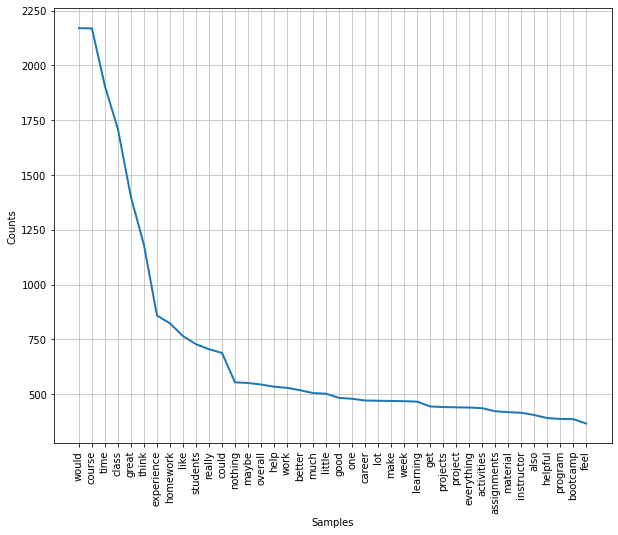

In [183]:
# Plot of the most common used words
plt.figure(figsize = (10,8))
fdist.plot(40)

- The previous list of words are definitely related to the topics expected from the text. Having words in the top 40 most used words in student comments such like course, time, class, homework, students, help, work, career, learning, project, activities, material, instructor, program, and bootcamp, are telling me that there is a clear trend on what students are commenting in the surveys. Also, I can identify some other words like great, like, better, good and helpful that possibly means positive feedback to the instructor or the program overall.

In [ ]:
# Perform a sentiment analysis on the "improvement" column to determine whether it is positive, neutral, or negative. 
# Use the Textblob library to return two new columns: polarity and subjectivity

# Show the first 10 rows
# Be prepared to explain what your analysis shows based on the polarity score and sentiment
# Utilize any visualizations at your disposal to support your analysis

In [161]:
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.0.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graph

In [162]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Hashing").getOrCreate()

In [163]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, StopWordsRemover

In [172]:
from pyspark.ml.feature import  Tokenizer
tokenizer = Tokenizer(inputCol="improvement", outputCol="words")
wordsData = tokenizer.transform(text)
wordsData.show()

AttributeError: ignored